<a href="https://colab.research.google.com/github/RojaCM/NLP/blob/main/Loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Loan Data Analysis

1. Load the dataset that is given to you

In [1]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('/content/loan_data (1).csv')

In [5]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.shape

(21340, 122)

2.  Check for null values in the dataset

In [7]:
data1=data.copy()

In [9]:
null=data.isnull().sum()

In [16]:
count=0

for i in data.columns:
  if data[i].isnull().any():
    count = count+1

In [17]:
count

85

#HANDLING NULL VALUES

In [46]:
# Calculate mean and median for each column with missing values
mean_values = data.mean()
median_values = data.median()

<ipython-input-46-a1cde15b870d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data.mean()
<ipython-input-46-a1cde15b870d>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = data.median()


In [47]:
# Fill missing values with mean or median
data_filled = data.fillna(median_values)  # or median_values

In [49]:
sum(data_filled.isnull().any())

6

In [57]:
data_filled.columns[data_filled.isnull().any()]

Index(['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [58]:
# Fill missing values with mode
mode_values = data.mode().iloc[0]
data_filled1= data_filled.fillna(mode_values)

In [60]:
sum(data_filled1.isnull().any())

0

#There are 85 columns with null values present

3.Print percentage of default to payer of the dataset for the TARGET column

In [23]:
data['TARGET'].value_counts()

0    19661
1     1679
Name: TARGET, dtype: int64

In [61]:
total=len(data_filled1)

In [62]:
len_default=data_filled1['TARGET'].sum()

In [63]:
percentage_default=np.round(len_default/total *100,3)

In [64]:
percentage_default

7.868

In [65]:
print("Percentage of defaults:", percentage_default, "%")

Percentage of defaults: 7.868 %


## Now data_encoded contains the dataset with one-hot encoded categorical columns

In [66]:
cat_cols=data_filled1.select_dtypes(include=object)

In [67]:
cat_cols.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [68]:
cat_cols=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [69]:

# Convert categorical columns to one-hot encoded columns
data_encoded = pd.get_dummies(data_filled1, columns=cat_cols)

In [70]:
data_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,1,0,0,1,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,1,0,0,1,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,1,0,0,1,0


In [71]:
data_encoded.shape

(21340, 242)

In [72]:
data2=data_encoded.copy()

# Balance the dataset if the data is imbalanced

In [73]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Separate features and target variable
X = data_encoded.drop(columns=["TARGET"])
y = data_encoded["TARGET"]

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [74]:
print(X_resampled.shape, y_resampled.shape)

(39322, 241) (39322,)


In [79]:
X_resampled.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,1,0,0,1,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,1,0,0,1,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,1,0,0,1,0


In [75]:
 y_resampled.nunique()

2

In [76]:
y_resampled.value_counts()

1    19661
0    19661
Name: TARGET, dtype: int64

#Plot the balanced data or imbalanced data

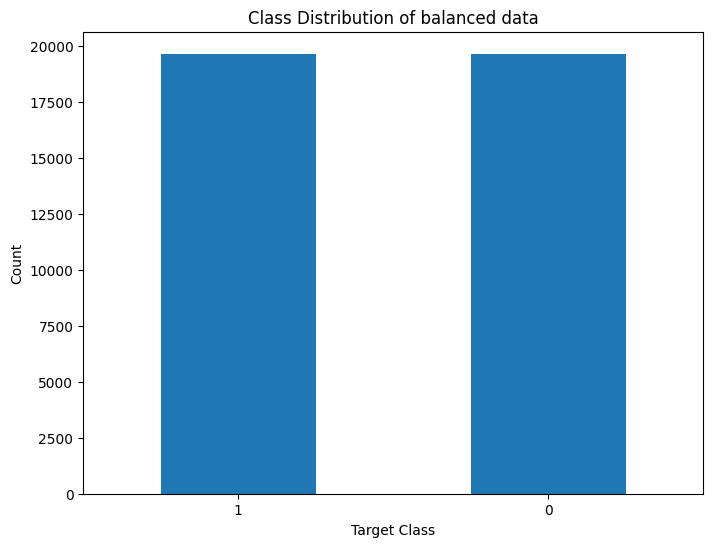

In [81]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot class distribution
plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind="bar")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Class Distribution of balanced data")
plt.xticks(rotation=0)
plt.show()

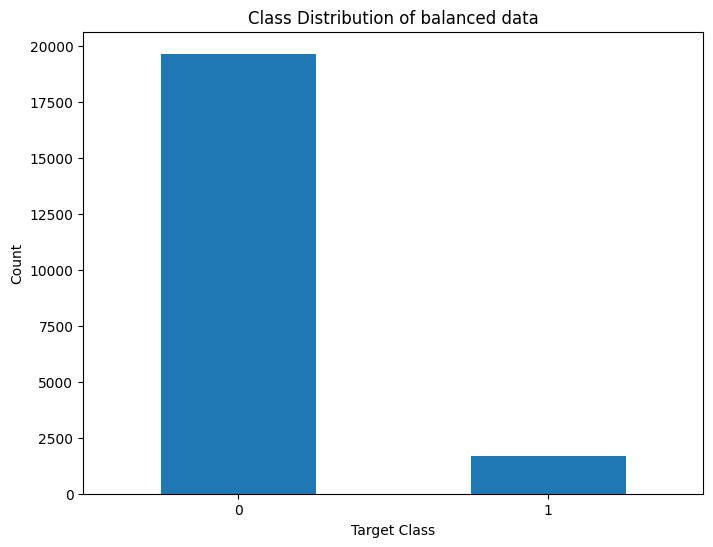

In [82]:

# Plot class distribution
plt.figure(figsize=(8, 6))
data_filled1['TARGET'].value_counts().plot(kind="bar")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Class Distribution of balanced data")
plt.xticks(rotation=0)
plt.show()